In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns
%matplotlib inline

In [61]:
df=pd.read_csv("D:\sajith\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [62]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [63]:
df.shape
type(df)
df.size
df.head()
df.tail()

(7043, 21)

pandas.core.frame.DataFrame

147903

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [64]:
pd.isnull(df).any()
pd.isnull(df).sum()
df.info()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [65]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'].str.replace(' ',''),errors='force')

In [107]:
df=df.fillna(df.median())

In [108]:
pd.isnull(df).any()
pd.isnull(df).sum()
df.info()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
Y                   False
dtype: bool

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Y                   0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
Y                   7043 non-nul

In [109]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Y
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [110]:
print('Counts of Labels')
df.groupby("Churn").size()

Counts of Labels


Churn
No     5174
Yes    1869
dtype: int64

In [111]:
le=preprocessing.LabelEncoder()

In [112]:
le.fit(df['Churn'])

LabelEncoder()

In [113]:
list(le.classes_)

['No', 'Yes']

In [114]:
dfn=le.transform(df['Churn'])

In [115]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [116]:
df['Y']=dfn
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
Y                   7043 non-nul

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Y'],
      dtype='object')

In [117]:
x_catg=df.loc[:,('gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod')]
x_catg.head()
x_catg.shape

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


(7043, 15)

In [118]:
x_num=df.loc[:,('SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges')]
x_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [119]:
x_num1=pd.get_dummies(x_catg)
x_num1.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [120]:
x=pd.concat([x_num1,x_num],axis=1)
x.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,2,53.85,108.15
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,2,70.70,151.65


In [121]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
Partner_No                                 7043 non-null uint8
Partner_Yes                                7043 non-null uint8
Dependents_No                              7043 non-null uint8
Dependents_Yes                             7043 non-null uint8
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uint8
InternetService_Fiber optic                7043 non-null uint8
InternetService_No                         7043 non-null uint8
OnlineSecur

In [122]:
y=df['Y']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Y, dtype: int64

In [123]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(5282, 45)

(1761, 45)

(5282,)

(1761,)

pandas.core.frame.DataFrame

In [124]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [125]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
log.coef_

array([[ -6.54351041e-02,  -7.21229229e-02,  -1.06592731e-01,
         -3.09652959e-02,  -3.99738297e-02,  -9.75841973e-02,
          1.05306688e-01,  -2.42864715e-01,  -2.33592675e-01,
          1.05306688e-01,  -9.27204024e-03,  -3.56409253e-01,
          3.26148185e-01,  -1.07296960e-01,   2.10997937e-01,
         -1.07296960e-01,  -2.41259004e-01,   9.16178610e-02,
         -1.07296960e-01,  -1.21878928e-01,   4.99350703e-02,
         -1.07296960e-01,  -8.01961378e-02,   1.91963218e-01,
         -1.07296960e-01,  -2.22224286e-01,  -8.85718377e-02,
         -1.07296960e-01,   5.83107702e-02,  -1.26375103e-01,
         -1.07296960e-01,   9.61140353e-02,   5.11724840e-01,
         -1.37555114e-01,  -5.11727753e-01,  -2.14334065e-01,
          7.67760379e-02,  -8.59865921e-02,  -1.31133675e-01,
          2.07551012e-01,  -1.27988772e-01,   2.47274451e-01,
         -6.26287864e-02,   3.78283288e-03,   3.31405499e-04]])

In [127]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values('Variable',ascending=True)

,Variable,Coeff
32,Contract_Month-to-month,0.511725
33,Contract_One year,-0.137555
34,Contract_Two year,-0.511728
4,Dependents_No,-0.039974
5,Dependents_Yes,-0.097584
20,DeviceProtection_No,0.049935
21,DeviceProtection_No internet service,-0.107297
22,DeviceProtection_Yes,-0.080196
11,InternetService_DSL,-0.356409
12,InternetService_Fiber optic,0.326148


In [128]:
classes=log.predict(test_x)
print(classes.size)
print('Postive case in Test Data:', test_y[test_y==1].shape[0])
print('Negative case in Test Data:', test_y[test_y==0].shape[0])

1761
Postive case in Test Data: 434
Negative case in Test Data: 1327


In [139]:
classes

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [141]:
classes.shape

(1761,)

In [134]:
print('Accuracy Score')
print(metrics.accuracy_score(test_y,classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,classes))
print('AUC')
auc=metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.811470755253
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.86      0.89      0.88      1327
          1       0.63      0.57      0.60       434

avg / total       0.81      0.81      0.81      1761

AUC


0.73070298202174611

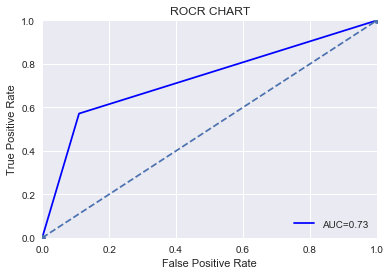

In [136]:
fpr,tpr,th=roc_curve(test_y, classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr, 'b' ,label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')             
plt.show();

Confusion Matrix


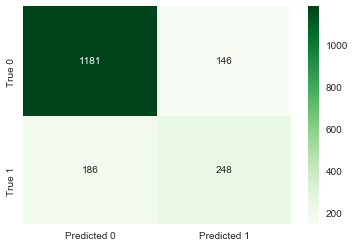

In [142]:
print('Confusion Matrix')
cf= metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf, annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()
      